Purpose of this notebook is to demonstrate the process of getting optimal cutoff (based on Youden index) from training ROC, and generating performance metrics based on the selected cutoff for test predictions. This can be used for  CV fold or holdout testing in the similar way.

In [1]:
import pickle
from generate_report import get_optimal_cutoff, get_pred_report, evalplots, class_report
import pandas as pd

Load the true labels and predicted probabilities in the train and test sets.

In [2]:
with open('train_test_pred_probs.pickle',"rb") as f:
    data = pickle.load(f)    

In [3]:
data['train_y_true']

,Atrial fibrillation,STEMI,NSTEMI
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
...,...,...,...
361595,0.0,0.0,0.0
361596,0.0,0.0,0.0
361597,0.0,0.0,1.0
361598,0.0,0.0,0.0


In [4]:
train_y_true = data['train_y_true']
train_y_prob = data['train_y_prob']
test_y_true = data['test_y_true']
test_y_prob = data['test_y_prob']
text_labels = train_y_true.columns.tolist()
test_y_prob.head()

,Atrial fibrillation,STEMI,NSTEMI
0,0.092850,0.004717,0.170227
1,0.001584,0.000002,0.027985
2,0.117601,0.000228,0.019335
3,0.112092,0.000037,0.008679
4,0.011444,0.002702,0.055685


In [5]:
train_y_true

,Atrial fibrillation,STEMI,NSTEMI
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
...,...,...,...
361595,0.0,0.0,0.0
361596,0.0,0.0,0.0
361597,0.0,0.0,1.0
361598,0.0,0.0,0.0


Get the optimal cutoff point and generate the pred report

In [5]:
# Use the train_y to generate the optimal cutoff point
_,_, _, _, roc_j_thr_dict = get_optimal_cutoff(train_y_true.to_numpy(),train_y_prob.to_numpy(), text_labels)
# Use the test_y to generate report
class_df_dict, creport_dict = get_pred_report(test_y_true.to_numpy(),test_y_prob.to_numpy(),text_labels,roc_j_thr_dict, verbose=False) # verbose = False

class_df_dict provides binarized test predictions using test probabilities based on optimal cutoff.

In [5]:
class_df_dict['Atrial fibrillation']

,true,pred_proba,pred
0,0.0,0.092850,1
1,0.0,0.001584,0
2,0.0,0.117601,1
3,0.0,0.112092,1
4,0.0,0.011444,0
...,...,...,...
89275,0.0,0.024546,0
89276,0.0,0.034109,0
89277,0.0,0.012646,0
89278,0.0,0.003706,0


creport_dict provides a dictionary of various performance metrics for the test predictions (accuracy, auroc, auprc, f1_score, prec, rec, spec, aprec, br_score, tn, fp, fn, tp)

In [6]:
creport_dict['Atrial fibrillation']

{'accuracy': 0.7780577956989247,
 'auroc': 0.8364109730829756,
 'auprc': 0.4530186150895165,
 'f1_score': 0.2443656332227434,
 'prec': 0.14604129632161902,
 'rec': 0.7478991596638656,
 'spec': 0.7795778624876465,
 'aprec': 0.20622965295643408,
 'br_score': 0.042323010650302556,
 'tn': 66261,
 'fp': 18735,
 'fn': 1080,
 'tp': 3204}

**Atrial fibrillation**

Cutoff Probability based on Training ROC:  0.0842447
              precision    recall  f1-score   support

           0       0.98      0.78      0.87     84996
           1       0.15      0.75      0.24      4284

    accuracy                           0.78     89280
   macro avg       0.57      0.76      0.56     89280
weighted avg       0.94      0.78      0.84     89280

AUROC score: 0.8364
AUPRC score: 0.4530
Average precision-recall score: 0.2062
Accuracy score: 0.7781
Sensitivity / Recall score: 0.7479
Specificity score: 0.7796
Positive predictive value / Precision score: 0.1460
f1 score: 0.2444
Brier score: 0.0423

creport_dict {'accuracy': 0.7780577956989247, 'auroc': 0.8364109730829756, 'auprc': 0.4530186150895165, 'f1_score': 0.2443656332227434, 'prec': 0.14604129632161902, 'rec': 0.7478991596638656, 'spec': 0.7795778624876465, 'aprec': 0.20622965295643408, 'br_score': 0.042323010650302556, 'tn': 66261, 'fp': 18735, 'fn': 1080, 'tp': 3204}


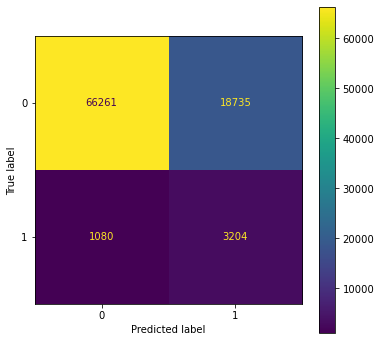

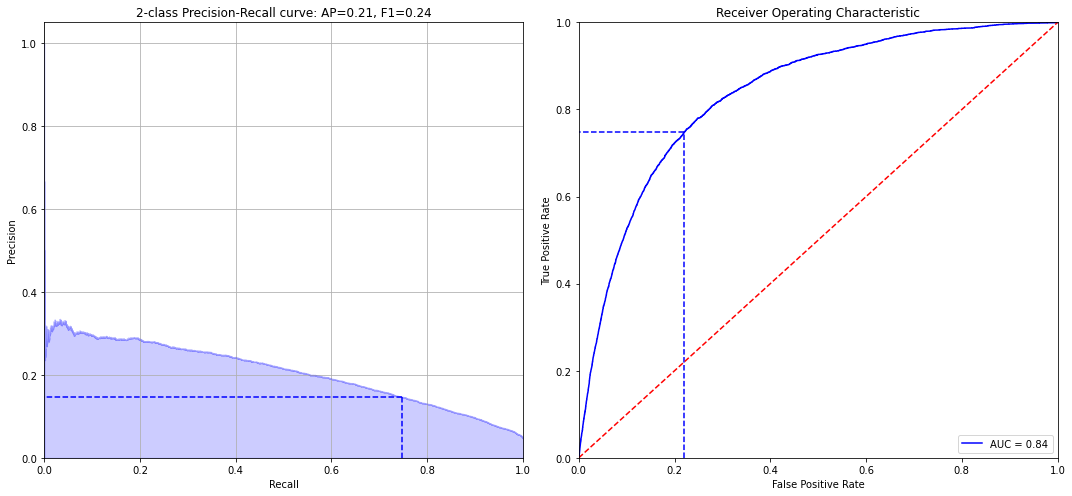

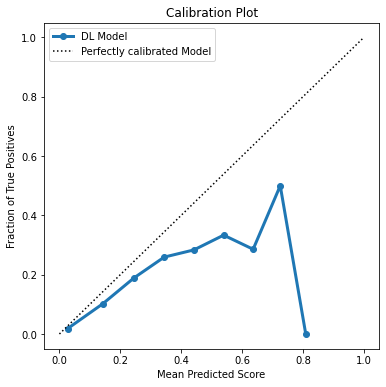

----------------------------------------


**STEMI**

Cutoff Probability based on Training ROC:  0.003203237
              precision    recall  f1-score   support

           0       1.00      0.85      0.92     89168
           1       0.01      0.75      0.01       112

    accuracy                           0.85     89280
   macro avg       0.50      0.80      0.46     89280
weighted avg       1.00      0.85      0.92     89280

AUROC score: 0.8543
AUPRC score: 0.3782
Average precision-recall score: 0.0130
Accuracy score: 0.8456
Sensitivity / Recall score: 0.7500
Specificity score: 0.8458
Positive predictive value / Precision score: 0.0061
f1 score: 0.0120
Brier score: 0.0013

creport_dict {'accuracy': 0.8456429211469534, 'auroc': 0.854256351573915, 'auprc': 0.3781921500661958, 'f1_score': 0.01204387411283963, 'prec': 0.006070680060706801, 'rec': 0.75, 'spec': 0.8457630540104073, 'aprec': 0.013020111745983352, 'br_score': 0.0012822770573934824, 'tn': 75415, 'fp': 13753, 'fn': 28, 'tp': 84}


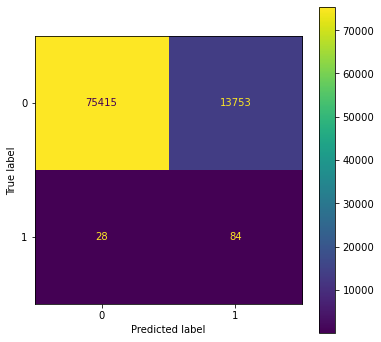

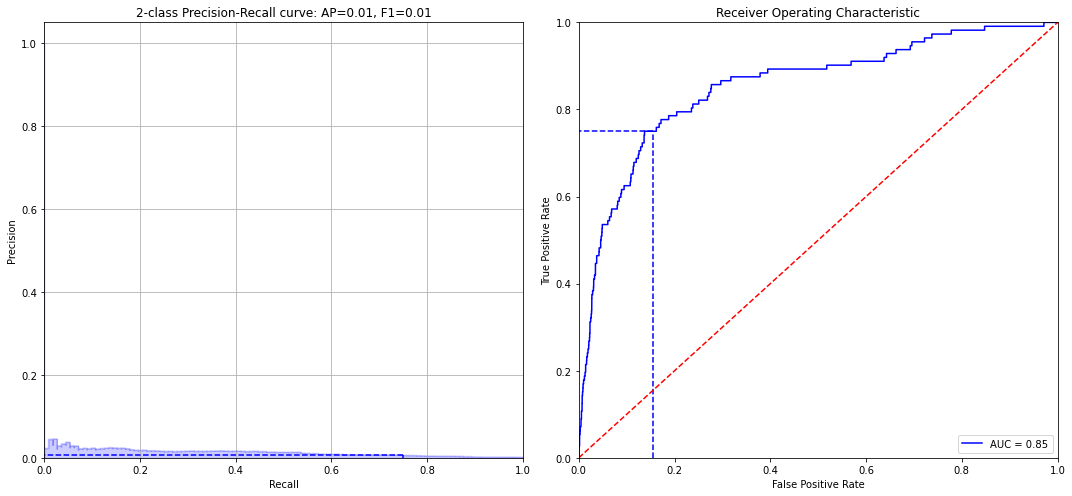

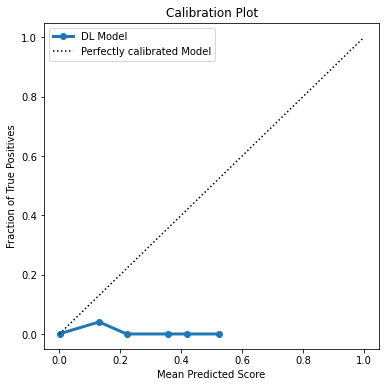

----------------------------------------


**NSTEMI**

Cutoff Probability based on Training ROC:  0.10338415
              precision    recall  f1-score   support

           0       0.99      0.78      0.87     86216
           1       0.10      0.72      0.18      3064

    accuracy                           0.78     89280
   macro avg       0.55      0.75      0.53     89280
weighted avg       0.96      0.78      0.85     89280

AUROC score: 0.8271
AUPRC score: 0.4159
Average precision-recall score: 0.2216
Accuracy score: 0.7781
Sensitivity / Recall score: 0.7180
Specificity score: 0.7802
Positive predictive value / Precision score: 0.1040
f1 score: 0.1817
Brier score: 0.0360

creport_dict {'accuracy': 0.7780913978494624, 'auroc': 0.8271016314358665, 'auprc': 0.41586091745737724, 'f1_score': 0.18172806872625147, 'prec': 0.10402874976357103, 'rec': 0.7180156657963447, 'spec': 0.7802264080913056, 'aprec': 0.22163476766006374, 'br_score': 0.03599004997608752, 'tn': 67268, 'fp': 18948, 'fn': 864, 'tp': 2200}


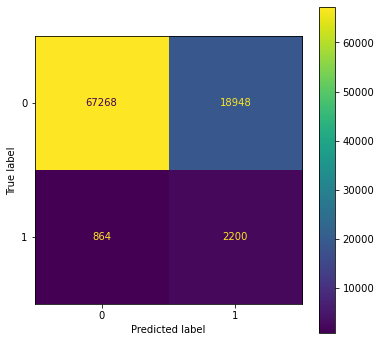

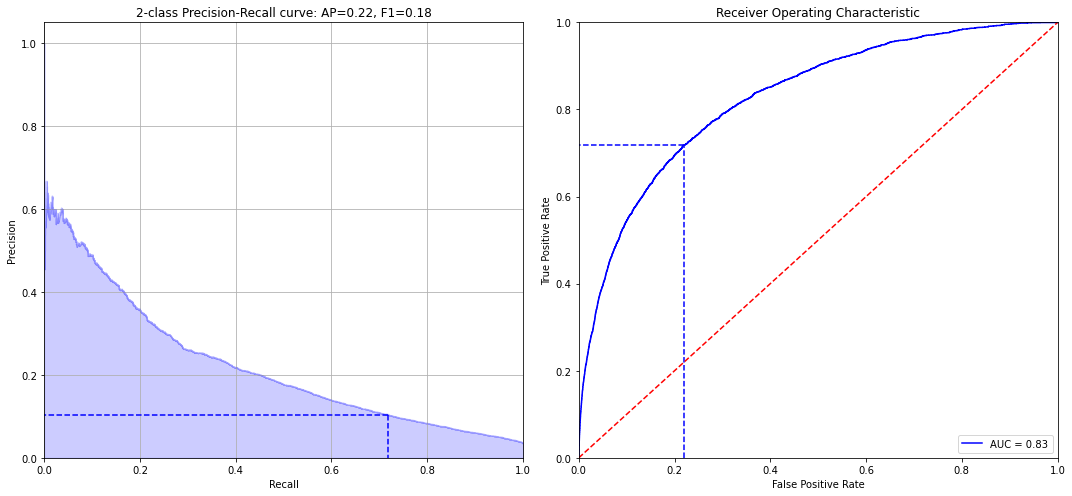

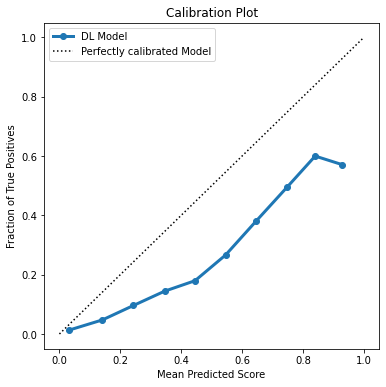

----------------------------------------


In [7]:
class_df_dict, creport_dict = get_pred_report(test_y_true.to_numpy(),test_y_prob.to_numpy(),text_labels,roc_j_thr_dict, verbose=True) # verbose = True